# **Financial Risk Exploratory Data Analysis**

# Data Dictionary

- **1. tipo_credito:**
- **2. fecha_prestamo:**
- **3. capital_prestado:**
- **4. plazo_meses:**
- **5. edad_cliente:**
- **6. tipo_laboral:**
- **7. salario_cliente:**
- **8. total_otros_prestamos:**
- **9. cuota_pactada:**
- **10. puntaje:**
- **11. puntaje_datacredito:**
- **12. cant_creditosvigentes:**
- **13. huella_consulta:**
- **14. saldo_mora:**
- **15. saldo_total:**
- **16. saldo_principal:**
- **17. saldo_mora_codeudor:**
- **18. creditos_sectorFinanciero:**
- **19. creditos_sectorCooperativo:**
- **20. creditos_sectorReal:**
- **21. promedio_ingresos_datacredito:**
- **22. tendencia_ingresos:**
- **23. Pago_atiempo:**

In [1]:
# Importación de Librerías

import os
from dotenv import load_dotenv
from pathlib import Path
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
# Cargar Environment

pth = Path(os.getenv("DATA_FILE"))

# Cargar Data

df = pd.read_excel(pth / "BD_creditos.xlsx")

df.sample(10)

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
9403,4,2025-02-26 11:54:47,4943040.0,24,35,Empleado,3200000,800000,217085,95.227787,...,0.0,2701.0,2701.0,0.0,2,0,0,925157.0,Creciente,1
3110,9,2025-06-27 11:33:05,2658963.6,10,44,Empleado,3000000,2000000,226469,95.227787,...,0.0,171.0,171.0,0.0,0,0,2,NaN,NaN,1
3705,4,2025-01-07 16:51:24,3011880.0,12,43,Empleado,2500000,900000,209158,72.686129,...,0.0,3491.0,3491.0,0.0,3,0,2,1792161.0,Decreciente,1
7568,4,2025-05-16 15:14:14,1006593.6,24,27,Independiente,2000000,500000,44611,95.227787,...,0.0,2060.0,2060.0,0.0,1,0,1,898247.0,Decreciente,1
9806,4,2025-04-14 18:00:08,1200000.0,6,29,Empleado,2500000,500000,178345,95.227787,...,0.0,559.0,559.0,0.0,2,0,0,714525.0,Decreciente,1
1723,4,2025-10-18 16:06:50,587520.0,6,26,Empleado,2410000,0,88851,95.227787,...,0.0,2309.0,2309.0,0.0,1,0,3,NaN,NaN,1
3893,4,2025-03-05 17:48:16,2056558.8,6,57,Empleado,1000000,240000,305648,95.227787,...,0.0,8595.0,553.0,0.0,3,0,0,925157.0,Creciente,1
2181,4,2025-09-09 12:46:04,1260000.0,6,44,Empleado,2520000,409000,191277,95.227787,...,0.0,23446.0,23446.0,0.0,4,0,1,151421.0,Creciente,1
2381,9,2025-02-07 10:11:44,1604400.0,2,44,Independiente,4000000,2000000,632417,95.227787,...,0.0,173161.0,173161.0,0.0,4,1,3,916148.0,Creciente,1
1052,9,2025-05-18 12:42:22,1596026.4,11,40,Empleado,3100000,1500000,124672,95.227787,...,0.0,3909.0,3909.0,0.0,1,0,0,941789.0,Creciente,1


# Datos Generales del Dataset

In [3]:
# Dataset Dimensiones

df.shape

(10763, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [5]:
# Cambio de tipo de dato a la variable objetivo

df['Pago_atiempo'] = df['Pago_atiempo'].astype('category')

In [6]:
# Ver las clases en columnas de tipo "object"

df["tipo_laboral"].unique()

array(['Empleado', 'Independiente'], dtype=object)

In [7]:
# Ver las clases en columnas de tipo "object"

df["tendencia_ingresos"].unique()

array(['Creciente', nan, 'Estable', 'Decreciente', 8315, 0, 158042, 3978,
       9147, 168750, -28589, 1000000, -566272, 24702, 31837, 122727,
       417087, 9090, 173031, -70715, -435177, -702927, -4105, 54683,
       22832, 209090, 5697, -288, -164315, 2029000, 17181, 15245, 82657,
       52862, 1817052, 75761, 146918, 1123000, 15090, 4250635, 22363,
       -101368, 86286, 65988, 77975, -224714, 10808], dtype=object)

# Corrreción de Valores

In [8]:
df['tendencia_ingresos'].unique()

array(['Creciente', nan, 'Estable', 'Decreciente', 8315, 0, 158042, 3978,
       9147, 168750, -28589, 1000000, -566272, 24702, 31837, 122727,
       417087, 9090, 173031, -70715, -435177, -702927, -4105, 54683,
       22832, 209090, 5697, -288, -164315, 2029000, 17181, 15245, 82657,
       52862, 1817052, 75761, 146918, 1123000, 15090, 4250635, 22363,
       -101368, 86286, 65988, 77975, -224714, 10808], dtype=object)

In [9]:
# Corrección de datos para la variable "tendencia_ingresos"

clases_validas = ['Creciente', 'Estable', 'Decreciente']

df['tendencia_ingresos'] = df['tendencia_ingresos'].apply(lambda x: x if x in clases_validas else np.nan)

In [10]:
df['tendencia_ingresos'].nunique()

3

# Conteo de Duplicados

In [11]:
# Verificación de registros duplicados

print(f"El dataset tiene {df.duplicated().sum()} duplicados")

El dataset tiene 0 duplicados


# Conteo de Nulos

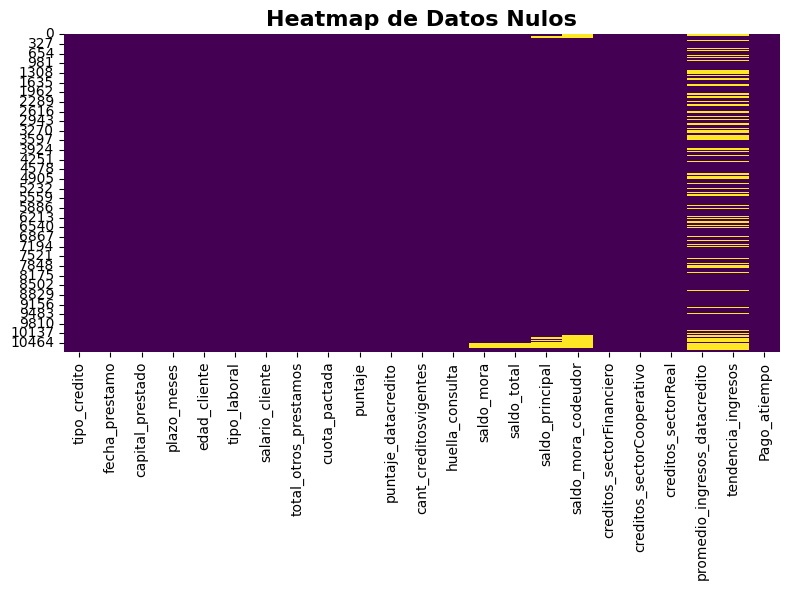

In [12]:
# Null Data Heatmap 

plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Heatmap de Datos Nulos', fontsize = 16, fontweight = 'bold')
plt.tight_layout()

plt.show()

In [13]:
print(df.isnull().sum().sort_values(ascending = False))

tendencia_ingresos               2990
promedio_ingresos_datacredito    2930
saldo_mora_codeudor               590
saldo_principal                   405
saldo_mora                        156
saldo_total                       156
puntaje_datacredito                 6
salario_cliente                     0
tipo_laboral                        0
edad_cliente                        0
plazo_meses                         0
capital_prestado                    0
fecha_prestamo                      0
tipo_credito                        0
total_otros_prestamos               0
cant_creditosvigentes               0
huella_consulta                     0
cuota_pactada                       0
puntaje                             0
creditos_sectorCooperativo          0
creditos_sectorFinanciero           0
creditos_sectorReal                 0
Pago_atiempo                        0
dtype: int64


In [14]:
# Percentage of Null values by column

for col in df.columns:

    print("El porcentaje de nulos en la columna ", col, "es: ", round(df[col].isnull().mean() * 100, 2), "%")

El porcentaje de nulos en la columna  tipo_credito es:  0.0 %
El porcentaje de nulos en la columna  fecha_prestamo es:  0.0 %
El porcentaje de nulos en la columna  capital_prestado es:  0.0 %
El porcentaje de nulos en la columna  plazo_meses es:  0.0 %
El porcentaje de nulos en la columna  edad_cliente es:  0.0 %
El porcentaje de nulos en la columna  tipo_laboral es:  0.0 %
El porcentaje de nulos en la columna  salario_cliente es:  0.0 %
El porcentaje de nulos en la columna  total_otros_prestamos es:  0.0 %
El porcentaje de nulos en la columna  cuota_pactada es:  0.0 %
El porcentaje de nulos en la columna  puntaje es:  0.0 %
El porcentaje de nulos en la columna  puntaje_datacredito es:  0.06 %
El porcentaje de nulos en la columna  cant_creditosvigentes es:  0.0 %
El porcentaje de nulos en la columna  huella_consulta es:  0.0 %
El porcentaje de nulos en la columna  saldo_mora es:  1.45 %
El porcentaje de nulos en la columna  saldo_total es:  1.45 %
El porcentaje de nulos en la columna  

# Estadísticas Generales

In [15]:
# Con describe

df.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
tipo_credito,10763.0,NaN,NaN,NaN,5.411131,4.0,4.0,4.0,9.0,68.0,2.338279
fecha_prestamo,10763,NaN,NaN,NaN,2025-04-16 23:06:02.111121408,2024-11-26 09:17:04,2025-01-20 17:33:07.500000,2025-03-27 16:23:12,2025-06-16 13:27:58,2026-04-26 18:43:52,NaN
capital_prestado,10763.0,NaN,NaN,NaN,2434315.001319,360000.0,1224831.0,1921920.0,3084840.0,41444152.8,1909642.758997
plazo_meses,10763.0,NaN,NaN,NaN,10.575583,2.0,6.0,10.0,12.0,90.0,6.632082
edad_cliente,10763.0,NaN,NaN,NaN,43.94862,19.0,33.0,42.0,53.0,123.0,15.060877
tipo_laboral,10763,2,Empleado,6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_cliente,10763.0,NaN,NaN,NaN,17216431.459909,0.0,2000000.0,3000000.0,4875808.0,22000000000.0,355476717.603482
total_otros_prestamos,10763.0,NaN,NaN,NaN,6238869.648518,0.0,500000.0,1000000.0,2000000.0,6787675263.0,118418316.941069
cuota_pactada,10763.0,NaN,NaN,NaN,243617.406671,23944.0,121041.5,182863.0,287833.5,3816752.0,210493.694608
puntaje,10763.0,NaN,NaN,NaN,91.170036,-38.00999,95.227787,95.227787,95.227787,95.227787,16.465441


In [16]:
# Kurtosis y Skew 

# Columnas numpericas

col_nums = df.select_dtypes(['int64', 'float64']).columns

resultados = []

for col in col_nums:

    kurt = kurtosis(df[col].dropna())
    skew_val = skew(df[col].dropna())
    
    resultados.append({
        'Columna': col,
        'Kurtosis': kurt,
        'Skew-Sesgo': skew_val
    })

kurtosis_skew = pd.DataFrame(resultados)

# Mostrar resultados

kurtosis_skew

,Columna,Kurtosis,Skew-Sesgo
0,tipo_credito,46.442120,2.671702
1,capital_prestado,35.301130,3.723365
2,plazo_meses,7.775949,2.459348
3,edad_cliente,7.864723,1.934129
4,salario_cliente,2210.202459,43.770563
5,total_otros_prestamos,1718.481718,38.458525
6,cuota_pactada,26.637820,3.792772
7,puntaje,24.069268,-4.864929
8,puntaje_datacredito,39.418912,-5.643726
9,cant_creditosvigentes,8.618783,1.797487


# Anotaciones Básicas sobre las Estadística Generales

* **capital_prestado" tien**e créditos de bajo importe donde el 75% de los datos están de $3.1 M hace abajo. Aunque la variabilidad de los datos es alta dada du desviación estandar de $1.9 M.
* **edad** tiene valores normales o estándares de población, sim embargo, el valor máximo es completamente dsfasado.
* **salario_cliente** presenta en gran mayoría valores bajos sin embargo la media y la desviación estándar se ven fuertemente afectados por los valores del percentil 75 en adelante. 
* **total_otros_prestamos** también presenta un sesgo fuerte por los valores del percentil 75 en adelante, ya que el 75% de los datos están en valores pequeños.
* **puntaje** en gran medida presenta valores muy similares, con baja desviación estándar sin embargo el mínimo es un valores negativo, por lo que podría ser un error.
* **puntaje_datacredito** también presenta en su mayoría valores entre 750 y 900.
* **cant_creditosvigentes**, la mayoria de valores están rangos considerables para la variable, el valor máximo resulta impensable inicialmente.

# Detección e Imputación de Outliers

En la variable "edad_cliente" tenemos 150 registros con edades superiores a 90. A pesar  que los 90 pueden ser una edad factible de bancarización, al hacer una búsqueda con un rango de edad superior a 100, se evidencias 150 registros, lo cual es impráctico e inverosimil para este caso.

In [17]:
# Valores con atípicos: personas mayores a 90 años --> np.nan

df.loc[df['edad_cliente'] > 90, 'edad_cliente'] = np.nan

print(df['edad_cliente'].max())

69.0


Existe un individuo con "total_otros_prestamos" de COP 1.500.000, si bien es un valor posible de un préstamo, sus demás variables no soportan esta cifra, ya que posee "salario_cliente" de 

In [19]:
#print(df['total_otros_prestamos'].quantile(1))

# Ver solo los registros con valores mayores a 100000000 en la columna "total_otros_prestamos"

df[df['total_otros_prestamos'] > 500000000]

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
7494,9,2025-02-06 10:29:00,1965441.6,11,33.0,Empleado,3000000,1500000000,152917,89.229500,...,0.0,279977.0,279977.0,0.0,3,0,0,1500000.0,Estable,1
10476,9,2025-07-20 12:12:28,1411467.6,3,NaN,Empleado,13258352050,4316463703,407861,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10487,9,2025-05-28 17:09:51,9160620.0,9,NaN,Empleado,732745574,1715477430,858391,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10495,9,2025-06-27 17:07:03,1690723.2,9,NaN,Empleado,3628315879,1995279822,158504,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10503,9,2025-09-07 15:19:33,1131320.4,9,NaN,Empleado,8252584000,3147612000,107025,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10505,9,2025-05-24 17:24:01,6553657.2,10,NaN,Empleado,12450806583,6787675263,554863,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10515,9,2025-06-19 14:29:08,7235408.4,10,NaN,Empleado,4857353453,1108557358,616253,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10516,9,2025-05-19 15:27:14,3289399.2,8,NaN,Empleado,1200000000,790000000,343519,91.410695,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10519,9,2025-11-26 12:14:21,1713600.0,2,NaN,Empleado,1453171870,656208833,682906,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1
10520,9,2025-10-23 15:40:27,4290198.0,6,NaN,Empleado,3979311000,3758729000,649722,95.227787,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1


# Variable Objetivo

<Axes: xlabel='Pago_atiempo'>

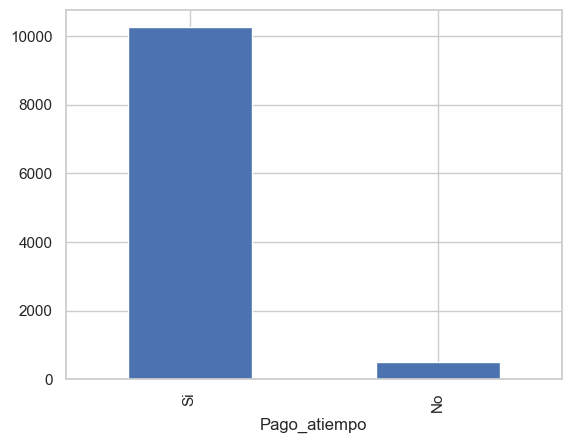

In [155]:
# Conteo de clases para la variable objetivo

df['Pago_atiempo'] = df['Pago_atiempo'].cat.rename_categories({0: "No", 1: "Si"})

df['Pago_atiempo'].value_counts().plot(kind = "bar")

# EDA Univariable (Numéricas)

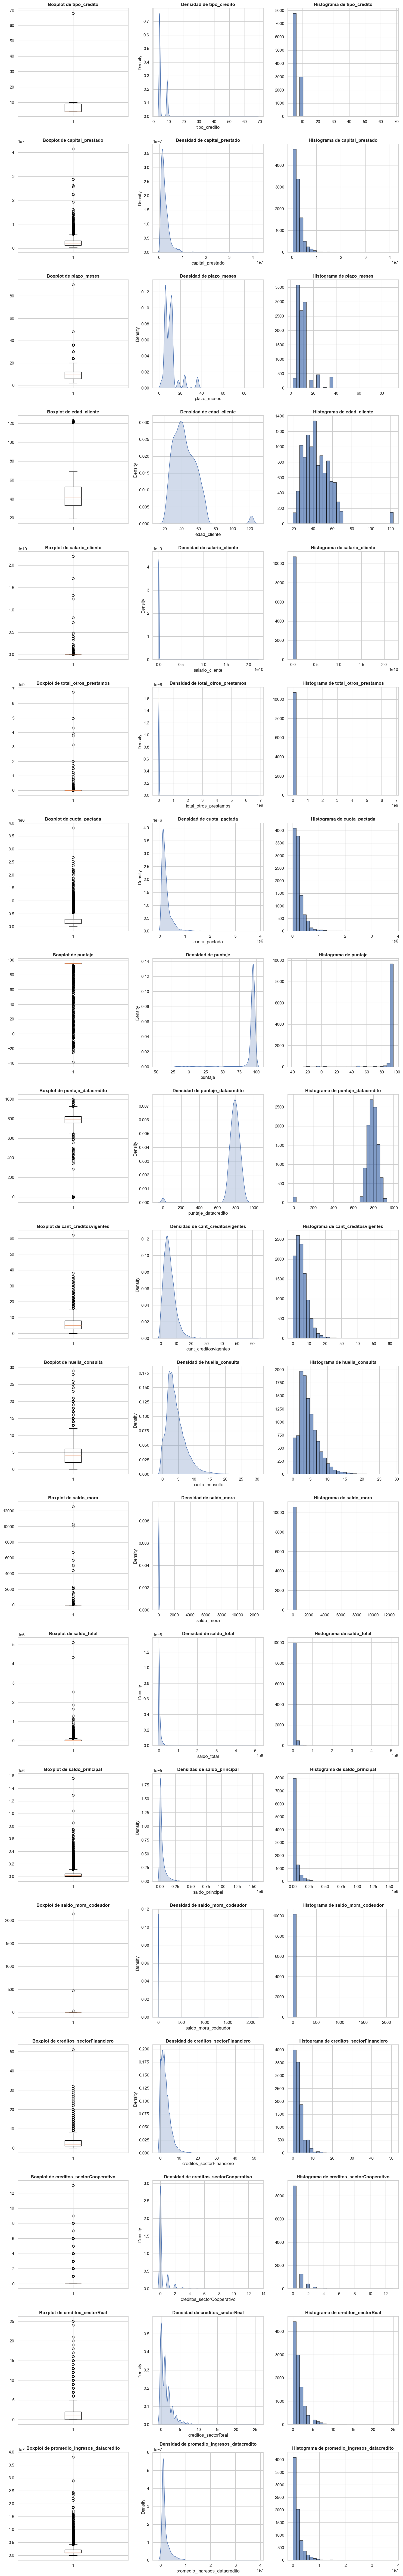

In [156]:
# Visualización de BoxPlot e Histograma de Densisdad para variables numéricas

if True:

    fig, axes = plt.subplots(nrows = len(col_nums), ncols = 3, figsize = (15, 5 * len(col_nums)))

    if len(col_nums) == 1:

        axes = axes.reshape(1, 3)

    for i, col in enumerate(col_nums):

        axes[i, 2].hist(df[col].dropna(), bins = 30, edgecolor = "black", alpha = 0.7)
        axes[i, 2].set_title(f"Histograma de {col}", fontweight = 'bold')

        sns.kdeplot(df[col], fill = True, ax = axes[i, 1])
        axes[i, 1].set_title(f"Densidad de {col}", fontweight = 'bold')

        axes[i, 0].boxplot(df[col].dropna(), vert = 0) 
        axes[i, 0].set_title(f"Boxplot de {col}", fontweight = 'bold')       

    plt.tight_layout()
    plt.show()

# Anotaciones sobre las gráficas

* 
* 
* 

# Análisis Numérico por Intervalos

In [157]:
# Creación de Tablas de Frcuencia para variables numéricas agrupadas por intervalos


# Generación de tabla de frecuencias para variable numérica agrupada en bins

def tabla_intervalos_numericos(df, col, bins = 5):

    # Creación de Intervalos 

    rangos = pd.cut(df[col], bins = bins)

    # Agrupación por intervalos y conteo de registros en cada intervalo

    tabla = (
        df.groupby(rangos, observed = False)[col]
          .count()
          .reset_index(name = "conteo")
          .sort_values(by = col)   
          .reset_index(drop = True)
    )

    # Calculo del procentaje de registros en cada intervalo

    tabla["porcentaje"] = (tabla["conteo"] / len(df) * 100)

    # Formatear porcentaje a dos decimales

    tabla["porcentaje"] = tabla["porcentaje"].map(lambda x: f"{x:.2f}%")

    return tabla

In [158]:
# Invocar la función

if True:

    for col in col_nums:

        print(f"\nTabla de Frecuencia para {col} agrupada en 5 intervalos:")

        display(tabla_intervalos_numericos(df, col, bins = 5))


Tabla de Frecuencia para tipo_credito agrupada en 5 intervalos:


,tipo_credito,conteo,porcentaje
0,"(3.936, 16.8]",10762,99.99%
1,"(16.8, 29.6]",0,0.00%
2,"(29.6, 42.4]",0,0.00%
3,"(42.4, 55.2]",0,0.00%
4,"(55.2, 68.0]",1,0.01%



Tabla de Frecuencia para capital_prestado agrupada en 5 intervalos:


,capital_prestado,conteo,porcentaje
0,"(318915.847, 8576830.56]",10615,98.62%
1,"(8576830.56, 16793661.12]",140,1.30%
2,"(16793661.12, 25010491.68]",3,0.03%
3,"(25010491.68, 33227322.24]",4,0.04%
4,"(33227322.24, 41444152.8]",1,0.01%



Tabla de Frecuencia para plazo_meses agrupada en 5 intervalos:


,plazo_meses,conteo,porcentaje
0,"(1.912, 19.6]",9880,91.80%
1,"(19.6, 37.2]",881,8.19%
2,"(37.2, 54.8]",1,0.01%
3,"(54.8, 72.4]",0,0.00%
4,"(72.4, 90.0]",1,0.01%



Tabla de Frecuencia para edad_cliente agrupada en 5 intervalos:


,edad_cliente,conteo,porcentaje
0,"(18.896, 39.8]",4614,42.87%
1,"(39.8, 60.6]",5012,46.57%
2,"(60.6, 81.4]",987,9.17%
3,"(81.4, 102.2]",0,0.00%
4,"(102.2, 123.0]",150,1.39%



Tabla de Frecuencia para salario_cliente agrupada en 5 intervalos:


,salario_cliente,conteo,porcentaje
0,"(-22000000.0, 4400000000.0]",10755,99.93%
1,"(4400000000.0, 8800000000.0]",4,0.04%
2,"(8800000000.0, 13200000000.0]",1,0.01%
3,"(13200000000.0, 17600000000.0]",2,0.02%
4,"(17600000000.0, 22000000000.0]",1,0.01%



Tabla de Frecuencia para total_otros_prestamos agrupada en 5 intervalos:


,total_otros_prestamos,conteo,porcentaje
0,"(-6787675.263, 1357535052.6]",10753,99.91%
1,"(1357535052.6, 2715070105.2]",4,0.04%
2,"(2715070105.2, 4072605157.8]",3,0.03%
3,"(4072605157.8, 5430140210.4]",2,0.02%
4,"(5430140210.4, 6787675263.0]",1,0.01%



Tabla de Frecuencia para cuota_pactada agrupada en 5 intervalos:


,cuota_pactada,conteo,porcentaje
0,"(20151.192, 782505.6]",10501,97.57%
1,"(782505.6, 1541067.2]",227,2.11%
2,"(1541067.2, 2299628.8]",30,0.28%
3,"(2299628.8, 3058190.4]",4,0.04%
4,"(3058190.4, 3816752.0]",1,0.01%



Tabla de Frecuencia para puntaje agrupada en 5 intervalos:


,puntaje,conteo,porcentaje
0,"(-38.143, -11.362]",67,0.62%
1,"(-11.362, 15.285]",140,1.30%
2,"(15.285, 41.933]",121,1.12%
3,"(41.933, 68.58]",210,1.95%
4,"(68.58, 95.228]",10225,95.00%



Tabla de Frecuencia para puntaje_datacredito agrupada en 5 intervalos:


,puntaje_datacredito,conteo,porcentaje
0,"(-8.006, 194.2]",147,1.37%
1,"(194.2, 395.4]",6,0.06%
2,"(395.4, 596.6]",19,0.18%
3,"(596.6, 797.8]",5796,53.85%
4,"(797.8, 999.0]",4789,44.50%



Tabla de Frecuencia para cant_creditosvigentes agrupada en 5 intervalos:


,cant_creditosvigentes,conteo,porcentaje
0,"(-0.062, 12.4]",10176,94.55%
1,"(12.4, 24.8]",550,5.11%
2,"(24.8, 37.2]",35,0.33%
3,"(37.2, 49.6]",1,0.01%
4,"(49.6, 62.0]",1,0.01%



Tabla de Frecuencia para huella_consulta agrupada en 5 intervalos:


,huella_consulta,conteo,porcentaje
0,"(-0.029, 5.8]",7904,73.44%
1,"(5.8, 11.6]",2562,23.80%
2,"(11.6, 17.4]",262,2.43%
3,"(17.4, 23.2]",29,0.27%
4,"(23.2, 29.0]",6,0.06%



Tabla de Frecuencia para saldo_mora agrupada en 5 intervalos:


,saldo_mora,conteo,porcentaje
0,"(-12.534, 2506.8]",10599,98.48%
1,"(2506.8, 5013.6]",2,0.02%
2,"(5013.6, 7520.4]",3,0.03%
3,"(7520.4, 10027.2]",0,0.00%
4,"(10027.2, 12534.0]",3,0.03%



Tabla de Frecuencia para saldo_total agrupada en 5 intervalos:


,saldo_total,conteo,porcentaje
0,"(-5116.066, 1023213.2]",10598,98.47%
1,"(1023213.2, 2046426.4]",6,0.06%
2,"(2046426.4, 3069639.6]",1,0.01%
3,"(3069639.6, 4092852.8]",0,0.00%
4,"(4092852.8, 5116066.0]",2,0.02%



Tabla de Frecuencia para saldo_principal agrupada en 5 intervalos:


,saldo_principal,conteo,porcentaje
0,"(-1562.285, 312457.0]",10239,95.13%
1,"(312457.0, 624914.0]",105,0.98%
2,"(624914.0, 937371.0]",11,0.10%
3,"(937371.0, 1249828.0]",1,0.01%
4,"(1249828.0, 1562285.0]",2,0.02%



Tabla de Frecuencia para saldo_mora_codeudor agrupada en 5 intervalos:


,saldo_mora_codeudor,conteo,porcentaje
0,"(-2.145, 429.0]",10171,94.50%
1,"(429.0, 858.0]",1,0.01%
2,"(858.0, 1287.0]",0,0.00%
3,"(1287.0, 1716.0]",0,0.00%
4,"(1716.0, 2145.0]",1,0.01%



Tabla de Frecuencia para creditos_sectorFinanciero agrupada en 5 intervalos:


,creditos_sectorFinanciero,conteo,porcentaje
0,"(-0.051, 10.2]",10585,98.35%
1,"(10.2, 20.4]",162,1.51%
2,"(20.4, 30.6]",13,0.12%
3,"(30.6, 40.8]",2,0.02%
4,"(40.8, 51.0]",1,0.01%



Tabla de Frecuencia para creditos_sectorCooperativo agrupada en 5 intervalos:


,creditos_sectorCooperativo,conteo,porcentaje
0,"(-0.013, 2.6]",10546,97.98%
1,"(2.6, 5.2]",197,1.83%
2,"(5.2, 7.8]",14,0.13%
3,"(7.8, 10.4]",5,0.05%
4,"(10.4, 13.0]",1,0.01%



Tabla de Frecuencia para creditos_sectorReal agrupada en 5 intervalos:


,creditos_sectorReal,conteo,porcentaje
0,"(-0.025, 5.0]",10413,96.75%
1,"(5.0, 10.0]",299,2.78%
2,"(10.0, 15.0]",41,0.38%
3,"(15.0, 20.0]",7,0.07%
4,"(20.0, 25.0]",3,0.03%



Tabla de Frecuencia para promedio_ingresos_datacredito agrupada en 5 intervalos:


,promedio_ingresos_datacredito,conteo,porcentaje
0,"(-38106.581, 7621316.2]",7625,70.84%
1,"(7621316.2, 15242632.4]",184,1.71%
2,"(15242632.4, 22863948.6]",17,0.16%
3,"(22863948.6, 30485264.8]",6,0.06%
4,"(30485264.8, 38106581.0]",1,0.01%


# Análisis de los Intervalos

*
*
*


# EDA Univariable (Categóricas)

In [159]:
#  Columnas Categóricas y sus valores

col_cats = df.select_dtypes(include = 'object').columns

for col in col_cats:

    print(f'Columna: {col}')
    print(df[col].value_counts(dropna = False))
    print("--" * 15)

Columna: tipo_laboral
tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64
------------------------------
Columna: tendencia_ingresos
tendencia_ingresos
Creciente      5294
NaN            2990
Decreciente    1291
Estable        1188
Name: count, dtype: int64
------------------------------


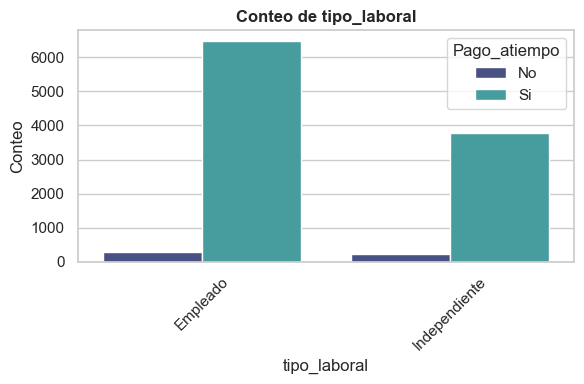

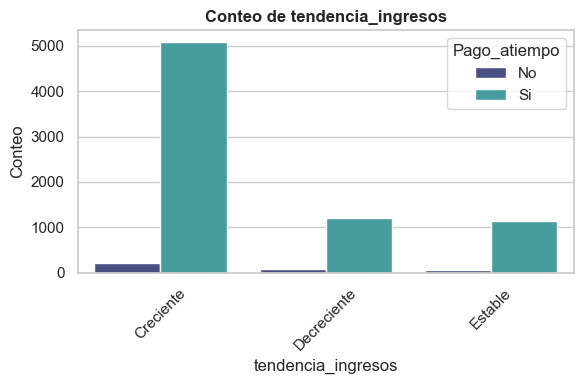

In [160]:
# Graficas variables categoricas

sns.set_theme(style = "whitegrid")

for i, col in enumerate(col_cats):

    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = col, hue = 'Pago_atiempo', order = df[col].value_counts().index, palette = 'mako')
    plt.xticks(rotation = 45)
    plt.title('Conteo de ' + col, fontsize = 12, fontweight = 'bold')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Conteo')

    plt.show()

# Análisis Bivariable (Numéricas)

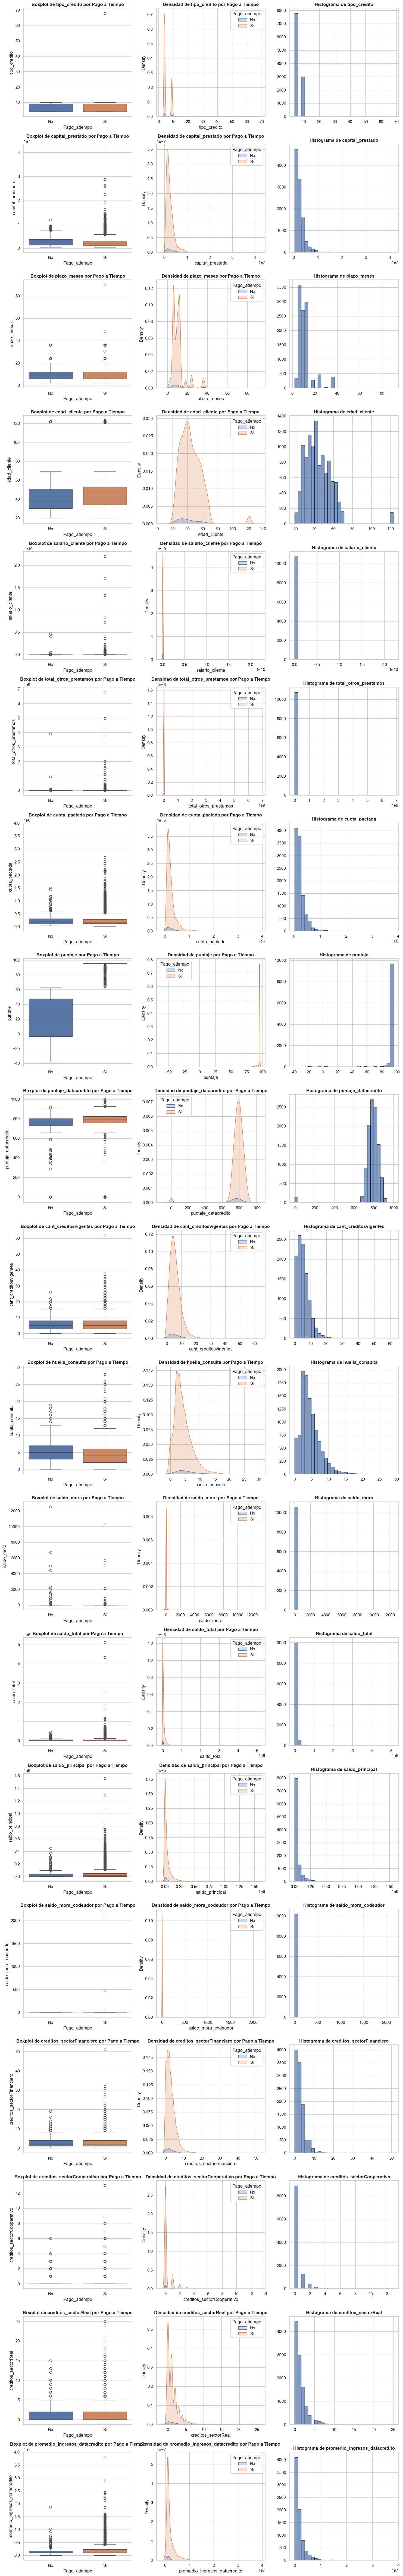

In [161]:
# Gráfico de Densidad y Boxplot respecto a la variable objetivo "Pago_atiempo"

if True:

    fig, axes = plt.subplots(nrows = len(col_nums), ncols = 3, figsize = (15, 5 * len(col_nums)))

    if len(col_nums) == 1:

        axes = axes.reshape(1, 3)

    for i, col in enumerate(col_nums):

        sns.kdeplot(data = df, x = col, hue = 'Pago_atiempo', fill = True, ax = axes[i, 1], warn_singular = False)
        axes[i, 1].set_title(f"Densidad de {col} por Pago a Tiempo", fontweight = 'bold')

        sns.boxplot(data = df, x = 'Pago_atiempo', y = col, hue = 'Pago_atiempo', ax = axes[i, 0])
        axes[i, 0].set_title(f"Boxplot de {col} por Pago a Tiempo", fontweight = 'bold')
        axes[i, 2].hist(df[col].dropna(), bins = 30, edgecolor = "black", alpha = 0.7)

        axes[i, 2].set_title(f"Histograma de {col}", fontweight = 'bold')
    plt.tight_layout()
    plt.show()

# Análisis Bivariable (Categóricas)

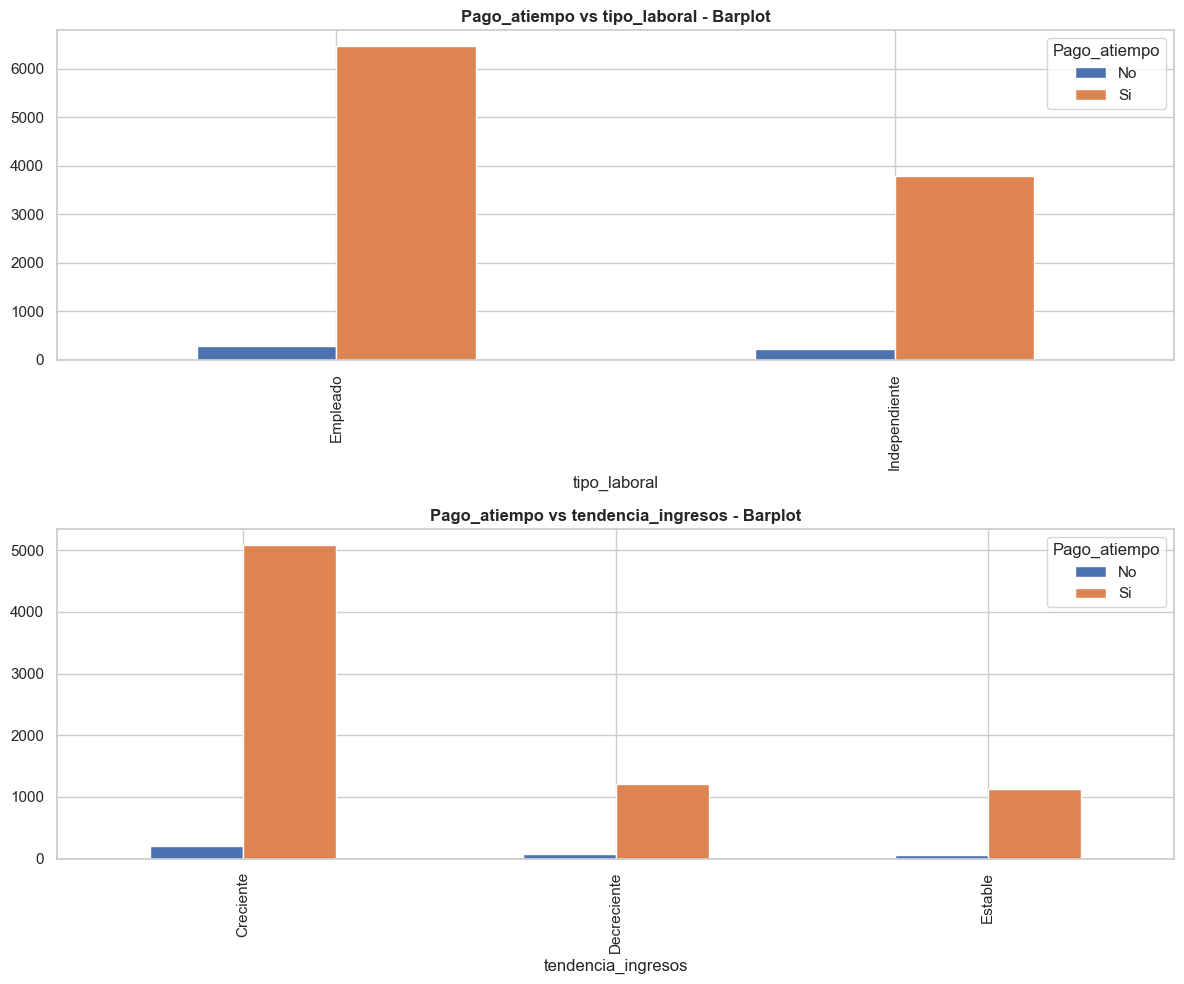

In [165]:
# Análisis bivarible respecto a la variable objetivo "Pago_atiempo" 

if True:

    fig, axes = plt.subplots(
        nrows = len(col_cats),
        ncols = 1,
        figsize = (12, 5 * max(len(col_cats), 1))
    )

    if len(col_cats) == 1:

        axes = [axes]

    for i, col in enumerate(col_cats):

        pd.crosstab(df[col], df["Pago_atiempo"]).plot(kind = "bar", ax = axes[i])

        axes[i].set_title(f"Pago_atiempo vs {col} - Barplot", fontweight = "bold")

    plt.tight_layout()
    plt.show()

En este punto del análisis (en orden cronológico) se contempló realizar la detección e imputación de outliers; sin embargo, este procedimiento se llevará a cabo en una etapa posterior. Esto permitirá visualizar los resultados con mayor claridad, trabajando con datos más limpios y más cercanos a su distribución real, sin que valores atípicos u observaciones inusuales distorsionen el análisis.